In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [6]:
ds = pd.read_csv("Salary_Data.csv")
X = ds["YearsExperience"].values
Y = ds["Salary"].values

In [7]:
X
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

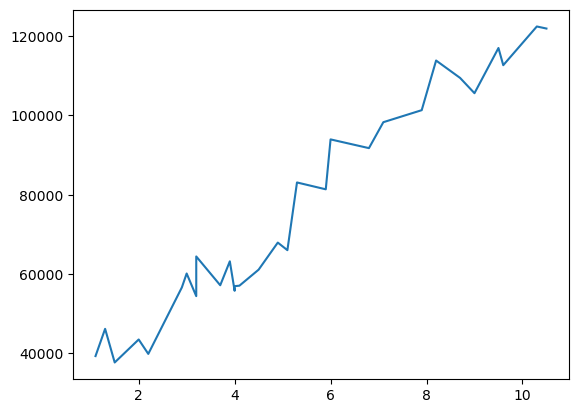

In [8]:
X = np.array(X)
Y = np.array(Y)
plt.plot(X,Y)

In [9]:
def mean(x):
    return np.sum(X)/len(X)

def variance(X):
    mean_val = mean(X)
    return np.sum((X-mean_val)**2)/len(X)

def norm(X):
    mean_val = mean(X)
    variance_val = variance(X)
    return (X-mean_val)/np.sqrt(variance_val)

X_norm = norm(X)
X_norm

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

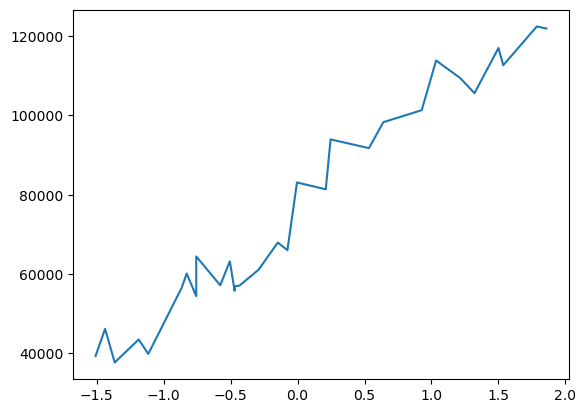

In [10]:
plt.plot(X_norm,Y)

In [22]:
class SLinReg:
    def __init__(self, lr = 0.1, max_iter = 2000, threshold = 1e-6):
        self.lr = lr
        self.max_iter = max_iter
        self.threshold = threshold
        self.weight = random.uniform(-1,1)
        self.bias = random.uniform(-1,1)
    def predict(self,X):
        return self.weight*X + self.bias
    def fit(self, X,Y):
        n = len(X)
        loss_history = []
        y_pred = self.predict(X)
        error = Y-y_pred
        prev_loss = (1/(2*n)) * np.sum(error**2)
        loss_history.append(prev_loss.item())

        for i in range(self.max_iter):
            w_grad = 1/n * np.sum(error*X)
            b_grad = 1/n * np.sum(error)
            self.weight += self.lr * w_grad
            self.bias += self.lr * b_grad
            y_pred = self.predict(X)
            error = Y - y_pred
            curr_loss = (1/(2*n)) *np.sum(error**2)
            if np.abs(curr_loss - prev_loss) < self.threshold:
                break
            prev_loss = curr_loss
            loss_history.append(curr_loss.item())
        return loss_history
    def plot(self,X,Y):
        y_pred = self.predict(X)
        plt.plot(X,Y)
        plt.plot(X,y_pred)



In [23]:
model = SLinReg()

In [24]:
loss_history = model.fit(X_norm, Y)

In [27]:
loss_history

[3251397743.5607643,
 2636602912.697836,
 2138619099.6988642,
 1735252211.1696968,
 1408525031.4610713,
 1143876015.8970842,
 929510313.290255,
 755874094.1787229,
 615228756.6983823,
 501306033.3393064,
 409028627.4184548,
 334283928.6225652,
 273740722.5978945,
 224700725.71791124,
 184978328.24512482,
 152803186.29216784,
 126741321.31027259,
 105631210.67493747,
 88532021.0603161,
 74681677.47247265,
 63462899.1663195,
 54375688.73833553,
 47015048.291668445,
 41052929.52986815,
 36223613.3328099,
 32311867.21319271,
 29143352.85630276,
 26576856.22722191,
 24497993.95766646,
 22814115.519326523,
 21450173.98427119,
 20345381.340876352,
 19450499.29972654,
 18725644.84639518,
 18138512.73919678,
 17662935.73236609,
 17277718.35683322,
 16965692.282651603,
 16712951.16256448,
 16508230.855293926,
 16342407.406404758,
 16208090.412804546,
 16099293.647988377,
 16011168.268487278,
 15939786.71109139,
 15881967.649600722,
 15835134.209793283,
 15797199.123549245,
 15766471.703691583,
 

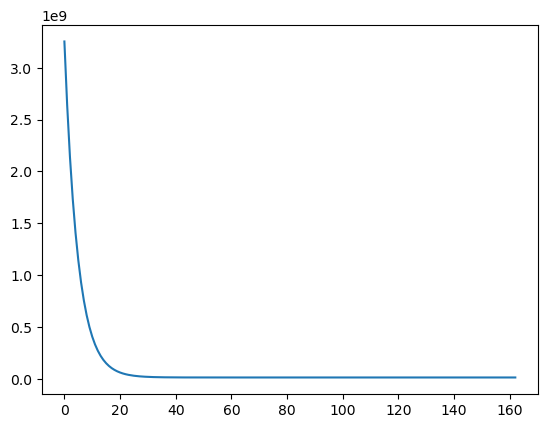

In [28]:
plt.plot(loss_history)

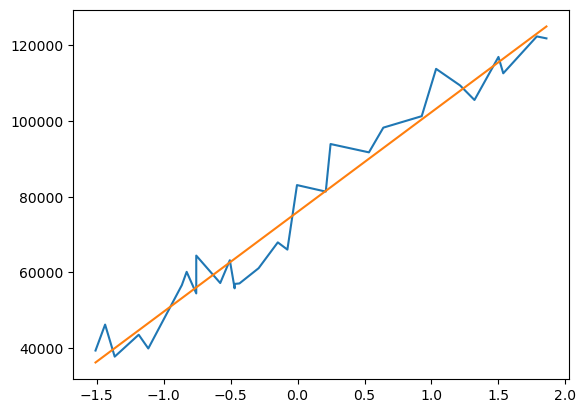

In [29]:
model.plot(X_norm,Y)